## Analysis of the applied heuristics functions

As explained in the README file, the program has been evaluated with three different heuristics functions.
For these experiments the players were the computers PC1 and PC2 and now we'll analyze the results.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import ndarray

In [72]:
def time_analysis(df):
    fig, axs = plt.subplots(1,2)
    axs[0].boxplot(df[df['Player']=="PC1"]['Times'])
    axs[0].set_title('PC1 times')
    axs[1].boxplot(df[df['Player']=="PC2"]['Times'])
    axs[1].set_title('PC2 times')
    plt.show()
    df_PC1=df['Player']=='PC1'
    df_PC1=df[df_PC1]
    PC1mean = df_PC1['Times'].describe()['mean']
    df_PC2=df['Player']=='PC2'
    df_PC2=df[df_PC2]
    PC2mean = df_PC2['Times'].describe()['mean']
    print(f"The mean time for PC1 is {round(PC1mean,2)}s and the mean time for PC2 is {round(PC2mean,2)}s")

In [109]:
def heuristic_analysis(df):
    df_PC1=df['Player']=='PC1'
    PC1=df[df_PC1]
    h1 =PC1['Heuristic']

    df_PC2 =df['Player']=="PC2"
    PC2=df[df_PC2]
    h2 =PC2['Heuristic']

    mov1 = PC1['Movements']
    mov2 = PC2['Movements']
    
    fig, ax = plt.subplots(1,2)

    ax[0].plot(mov1, h1, color='orange')
    ax[0].set(xticks=[])
    ax[0].set_title("PC1")
    ax[0].set_ylabel("Heuristic")
    ax[0].set_xlabel("Actions")
    ax[1].plot(mov2, h2)
    ax[1].set(xticks=[])
    ax[1].set_xlabel("Actions")
    ax[1].set_title("PC2")
    fig.tight_layout()

    plt.show()

#### First Heuristic Function

In [5]:
def othello_heuristic_count_tiles(state:ndarray,color):
    return state.sum()

Considering the previous heuristic and a depth value of 4 the obtained results are:

In [10]:
df = pd.read_csv('OthelloAdv_v1_loop_PC1_PC2_count_tiles_d4.csv')

First round

In [13]:
df[:2]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
0,0,PC1,D3,0.308005,4,3
1,1,PC2,C5,0.384049,3,0


Last round

In [15]:
df[-2:]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
59,59,PC2,B8,0.000999,26,12
60,60,PC1,ND,0.000921,38,12


The game ended in 30 rounds and with the last value of the Heuristic column, we can observe that the positive value represents that the difference of the board is in favor of player PC1. That is confirmed with the column 'In-FavorTiles' when the winner PC1 is confirmed. 

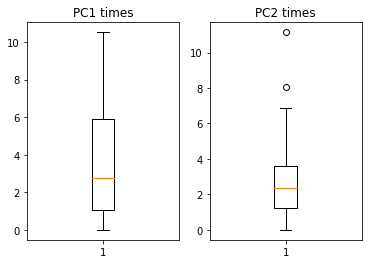

The mean time for PC1 is 3.67s and the mean time for PC2 is 2.89s


In [73]:
time_analysis(df)

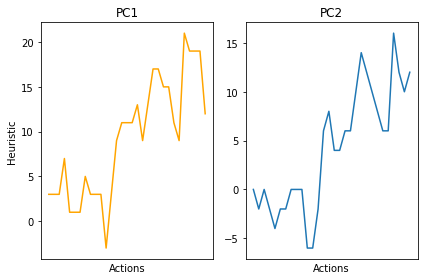

In [110]:
heuristic_analysis(df)


#### Second Heuristic Function

In [111]:
def othello_heuristic_possible_actions(state:ndarray, color: int):
    actions = othello_actions(state,color)
    quantity_of_actions = len(actions) * color
    return quantity_of_actions

In [112]:
df = pd.read_csv('OthelloAdv_v1_loop_PC1_PC2_h_actions_d4.csv')

First Round

In [113]:
df[:2]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
0,0,PC1,D3,0.453320,4,3
1,1,PC2,C3,0.514693,3,-5


Last Round

In [116]:
df[-2:]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
7,7,PC2,C1,0.539946,4,-3
8,8,PC1,ND,0.001001,8,4


The game ended in 4 rounds and with the last value of the Heuristic column, we can observe that the positive value represents that the difference of the board is in favor of player PC1. That is confirmed with the column 'In-FavorTiles' when the winner PC1 is confirmed. 

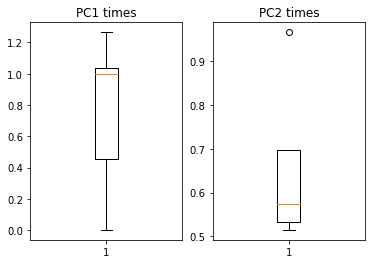

The mean time for PC1 is 0.75s and the mean time for PC2 is 0.66s


In [117]:
time_analysis(df)

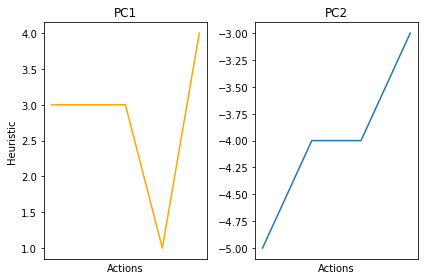

In [118]:
heuristic_analysis(df)

#### Third Heuristic Function

In [119]:
def othello_compose_heuristic(state:ndarray, color):
    return othello_heuristic_count_tiles() + othello_heuristic_possible_actions(state, color)

In [120]:
df = pd.read_csv('OthelloAdv_v1_loop_PC1_PC2_h_compose_count_actions_d4.csv')

First Round

In [121]:
df[:2]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
0,0,PC1,D3,0.203000,4,3
1,1,PC2,C5,0.278378,3,0


Last round

In [122]:
df[-2:]

,Unnamed: 0,Player,Movements,Times,In-FavorTiles,Heuristic
59,59,PC2,B8,0.002000,26,12
60,60,PC1,ND,0.000991,38,12


The game ended in 30 rounds and with the last value of the Heuristic column, we can observe that the positive value represents that the difference of the board is in favor of player PC1. That is confirmed with the column 'In-FavorTiles' when the winner PC1 is confirmed. 

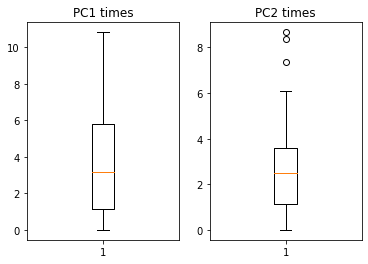

The mean time for PC1 is 3.72s and the mean time for PC2 is 2.95s


In [123]:
time_analysis(df)

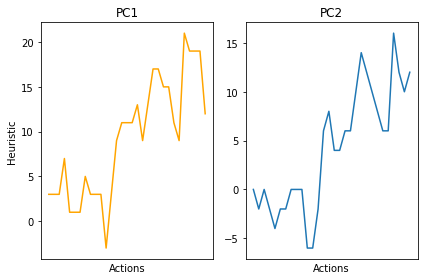

In [124]:
heuristic_analysis(df)